### Домашнее задание

1. Самостоятельно разобраться с тем, что такое tfidf (документация https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html и еще - https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог с помощью precision_recall_curve, как это делалось на уроке)
3. Повторить п.2, но используя уже не медиану, а max
4. (опциональное, если очень хочется) Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (подсказка: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал). Подсказка 2 - нужен именно idf, как вес.
5. Сформировать на выходе единую таблицу, сравнивающую качество 3 разных метода получения эмбедингов пользователей: mean, median, max, idf_mean по метрикам roc_auc, precision, recall, f_score
6. Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

#### Ссылки

1. http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf
2. https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation

#### Библиотеки, которые нужно установить:

1. gensim
2. razdel
3. pymorphy2
4. nltk

2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог с помощью precision_recall_curve, как это делалось на уроке)

In [135]:
user_articles_list = users['articles'].iloc[33]

def get_user_embedding(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.median(user_vector, 0)
    return user_vector

get_user_embedding(user_articles_list)

array([0.        , 0.03440726, 0.27885705, 0.        , 0.        ,
       0.        , 0.03870406, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05083423, 0.08529885, 0.02940185,
       0.        , 0.        , 0.        , 0.        , 0.04225085,
       0.        , 0.        , 0.        , 0.06462006, 0.        ])

In [136]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(25)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(25)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,u105138,0.000000,0.055283,0.101740,0.0,0.0,0.000000,0.0,0.051874,0.014849,...,0.000000,0.0,0.0,0.000000,0.044630,0.0,0.024420,0.000000,0.000000,0.000000
1,u108690,0.037659,0.065046,0.161742,0.0,0.0,0.050173,0.0,0.074859,0.000000,...,0.010179,0.0,0.0,0.008309,0.030369,0.0,0.000000,0.000000,0.103756,0.000000
2,u108339,0.086458,0.045030,0.125441,0.0,0.0,0.012296,0.0,0.006582,0.025398,...,0.056856,0.0,0.0,0.000000,0.082210,0.0,0.082515,0.010526,0.144589,0.009173


In [137]:
#target = pd.read_csv("users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [138]:
X = pd.merge(user_embeddings, target, how = 'left', on='uid')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,churn
0,u105138,0.000000,0.055283,0.101740,0.0,0.0,0.000000,0.0,0.051874,0.014849,...,0.0,0.0,0.000000,0.044630,0.0,0.024420,0.000000,0.000000,0.000000,0
1,u108690,0.037659,0.065046,0.161742,0.0,0.0,0.050173,0.0,0.074859,0.000000,...,0.0,0.0,0.008309,0.030369,0.0,0.000000,0.000000,0.103756,0.000000,1
2,u108339,0.086458,0.045030,0.125441,0.0,0.0,0.012296,0.0,0.006582,0.025398,...,0.0,0.0,0.000000,0.082210,0.0,0.082515,0.010526,0.144589,0.009173,1


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(25)]], 
                                                    X['churn'], random_state=0)

logreg = LogisticRegression()
#обучим наш пайплайн
logreg.fit(X_train, y_train)

preds = logreg.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

median_rating = [fscore[ix], precision[ix], recall[ix], roc_auc_score(y_test, preds)]
median_rating

Best Threshold=0.244115, F-Score=0.785, Precision=0.724, Recall=0.857


[0.7850467289719627,
 0.7241379310344828,
 0.8571428571428571,
 0.9721681493110065]

Confusion matrix, without normalization
[[1675   80]
 [  36  209]]


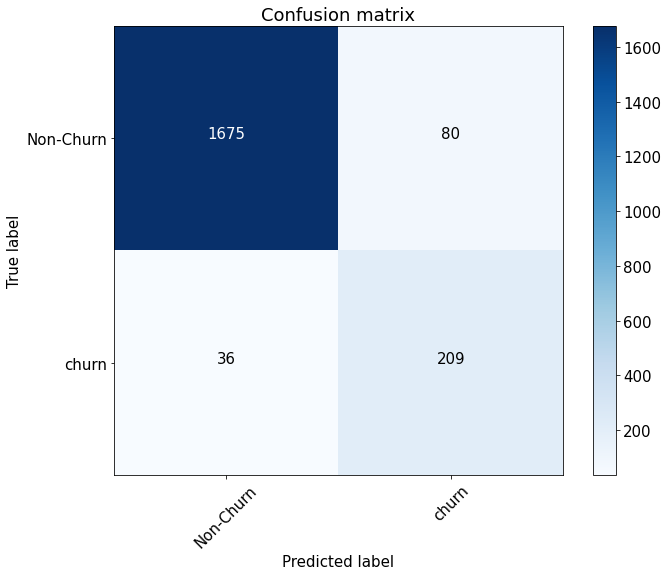

In [140]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.show()

In [141]:
roc_auc_score(y_test, preds)

0.9721681493110065

3. Повторить п.2, но используя уже не медиану, а max

In [142]:
def get_user_embedding(user_articles_list):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    user_vector = np.max(user_vector, 0)
    return user_vector

get_user_embedding(user_articles_list)

array([0.30857646, 0.24325332, 0.3725335 , 0.01098403, 0.04201239,
       0.07169505, 0.15013987, 0.18603823, 0.01859347, 0.01492469,
       0.05603762, 0.        , 0.20896515, 0.27852213, 0.40631363,
       0.13599227, 0.        , 0.        , 0.        , 0.06974844,
       0.        , 0.01040568, 0.0714591 , 0.3019813 , 0.        ])

In [143]:
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x), 1)])
user_embeddings.columns = ['topic_{}'.format(i) for i in range(25)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+['topic_{}'.format(i) for i in range(25)]]
user_embeddings.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24
0,u105138,0.160417,0.516509,0.337247,0.052914,0.00000,0.039788,0.118173,0.249779,0.322247,...,0.072482,0.089169,0.00000,0.000000,0.209405,0.000000,0.075481,0.278216,0.085248,0.041206
1,u108690,0.132323,0.335378,0.334089,0.014340,0.01728,0.137889,0.092318,0.225780,0.075963,...,0.075587,0.000000,0.00000,0.038038,0.113624,0.000000,0.116972,0.118947,0.187934,0.000000
2,u108339,0.153412,0.504869,0.256183,0.012662,0.00000,0.120654,0.117754,0.031577,0.121410,...,0.122183,0.000000,0.03717,0.013612,0.129378,0.014149,0.171452,0.079697,0.368080,0.059184


In [144]:
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [145]:
X = pd.merge(user_embeddings, target, how = 'left', on='uid')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,churn
0,u105138,0.160417,0.516509,0.337247,0.052914,0.00000,0.039788,0.118173,0.249779,0.322247,...,0.089169,0.00000,0.000000,0.209405,0.000000,0.075481,0.278216,0.085248,0.041206,0
1,u108690,0.132323,0.335378,0.334089,0.014340,0.01728,0.137889,0.092318,0.225780,0.075963,...,0.000000,0.00000,0.038038,0.113624,0.000000,0.116972,0.118947,0.187934,0.000000,1
2,u108339,0.153412,0.504869,0.256183,0.012662,0.00000,0.120654,0.117754,0.031577,0.121410,...,0.000000,0.03717,0.013612,0.129378,0.014149,0.171452,0.079697,0.368080,0.059184,1


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X[['topic_{}'.format(i) for i in range(25)]], 
                                                    X['churn'], random_state=0)

logreg = LogisticRegression()
#обучим наш пайплайн
logreg.fit(X_train, y_train)

preds = logreg.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

max_rating = [fscore[ix], precision[ix], recall[ix], roc_auc_score(y_test, preds)]
max_rating

Best Threshold=0.331782, F-Score=0.816, Precision=0.800, Recall=0.833


[0.816, 0.8, 0.8326530612244898, 0.9785731728588871]

Confusion matrix, without normalization
[[1704   51]
 [  42  203]]


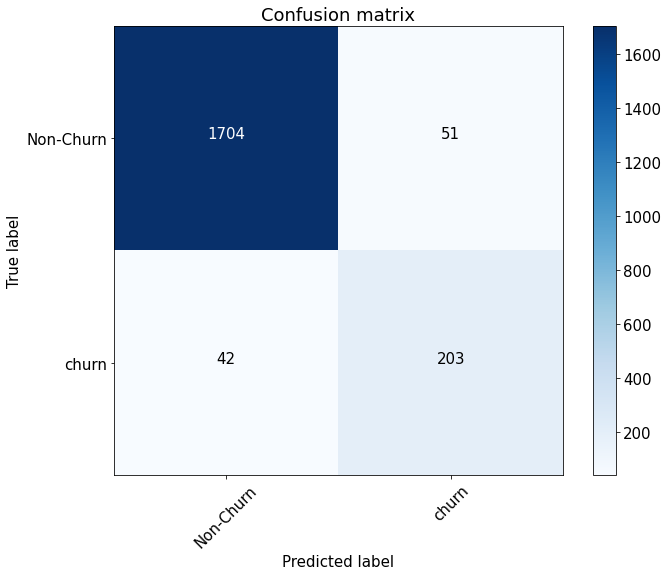

In [147]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds>thresholds[ix])
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.show()

In [148]:
roc_auc_score(y_test, preds)

0.9785731728588871

5. Сформировать на выходе единую таблицу, сравнивающую качество 3 разных метода получения эмбедингов пользователей: mean, median, max, idf_mean по метрикам roc_auc, precision, recall, f_score

In [149]:
pd.DataFrame.from_dict(res, orient='index', columns = ['F1_score', 'Precision', 'Recall', 'Roc Auc'])

,F1_score,Precision,Recall,Roc Auc
w_True m_mean,0.825758,0.792727,0.861660,0.914516
w_True m_median,0.867617,0.894958,0.841897,0.913793
w_True m_max,0.788732,0.803279,0.774704,0.873614
w_False m_mean,0.632509,0.571885,0.707510,0.815403
w_False m_median,0.773694,0.757576,0.790514,0.876940
w_False m_max,0.829268,0.789286,0.873518,0.919873


Со взвешиванием статей и метрики качества моделей выше, а с медианой в качестве метода F1_score, Precision максимальны, а Roc Auc близок к максимальному